# Supervised Learning-II

## Linear Regression
- Task: Regression

**Simple Linear Regression**
- Input has only one variable
- Model: y=ax+b
- Closest line to the data points.
- Sum of squares of the vertical lengths (residuals) are added together and minimized


**Multiple Linear Regression**
- Input has more than one variables
- Model: If there are two variables $x_1$ and $x_2$
  - $y=a_1x_1+a_2x_2+b$  
- Closest line to the data points.


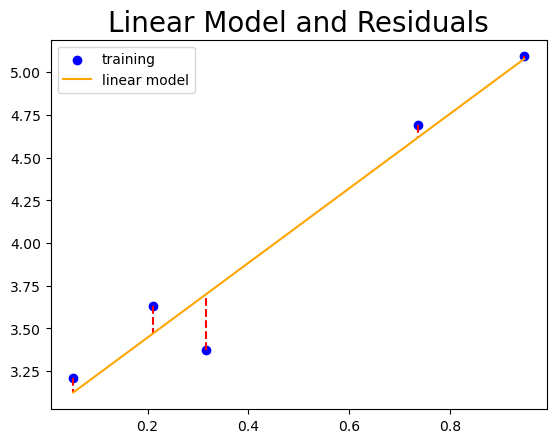

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,20)
noise = np.random.randn(20)/3
y = 2*x+3+noise

x_train = np.array([x[i] for i in [1,4,6,14,18]])
y_train = np.array([y[i] for i in [1,4,6,14,18]])

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train.reshape(-1,1),y_train)
y_l = lin_reg.predict(x_train.reshape(-1,1))

for i in range(x_train.shape[0]):
  plt.plot([x_train[i],x_train[i]], [y_train[i], y_l[i]], 'r--')

plt.scatter(x_train,y_train, label='training', c='b')
plt.plot(x_train,y_l,label= 'linear model', c='orange')
plt.title('Linear Model and Residuals', fontsize=20)
plt.legend();

### Simple Linear Regression

In [2]:
# Use Boston housing data
# Use LSTAT to predict price
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
# feature names
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
# X,y
X = dataset.data[:,0]
y = dataset.target

In [5]:
# X,y shapes
X.shape, y.shape

((20640,), (20640,))

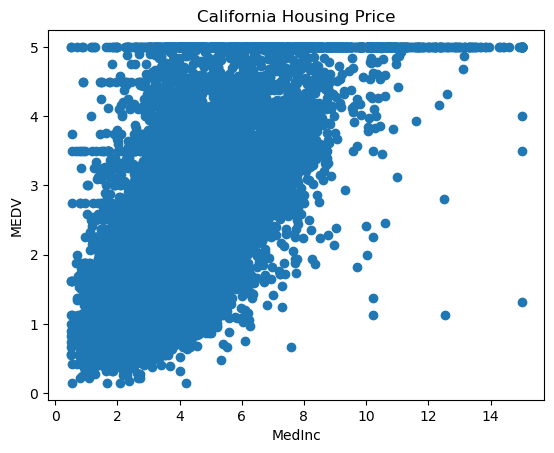

In [6]:
# scatter plot of MedInc vs MEDV
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel('MedInc')
plt.ylabel('MEDV')
plt.title('California Housing Price');

In [7]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

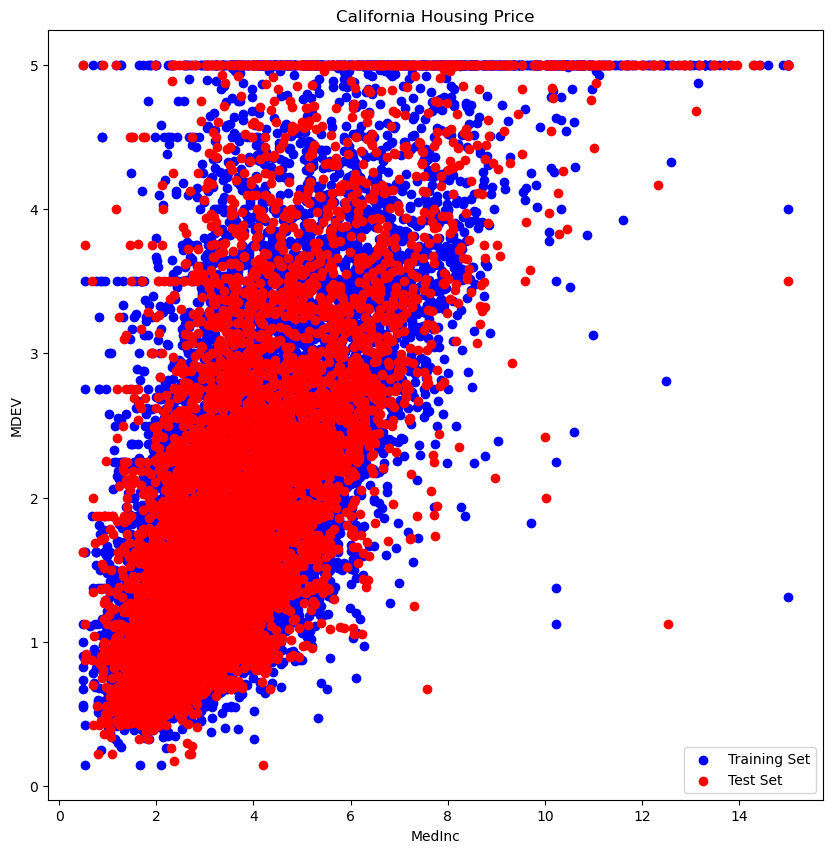

In [8]:
# plot training and test set
plt.figure(figsize=(10,10))
plt.scatter(X_train,y_train, label='Training Set', c='blue')
plt.scatter(X_test,y_test, label='Test Set', c='r')

plt.xlabel('MedInc')
plt.ylabel('MDEV')
plt.title('California Housing Price')
plt.legend();

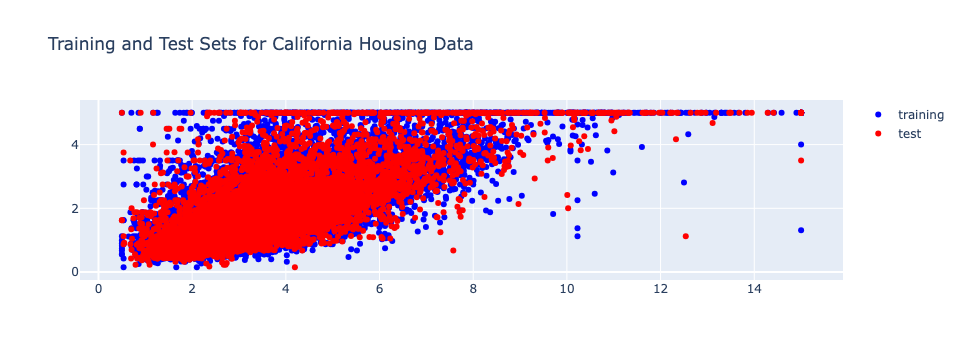

In [9]:
# use plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots()

fig.add_trace(go.Scatter(x=X_train, y=y_train, mode='markers',  marker=dict(color='blue'), name="training")  )
fig.add_trace(go.Scatter(x=X_test, y=y_test, mode='markers',marker=dict(color='red'),  name="test")  )


fig.update_layout(title_text="Training and Test Sets for California Housing Data")


In [10]:
# fit model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [11]:
# intercept
b = lin_reg.intercept_
b

0.44879836696807707

In [12]:
# ceoefficient
m = lin_reg.coef_
m

array([0.41731856])

In [13]:
# line x and y
import numpy as np
x_lin = np.linspace(0,40,100)
y_lin = m*x_lin+b

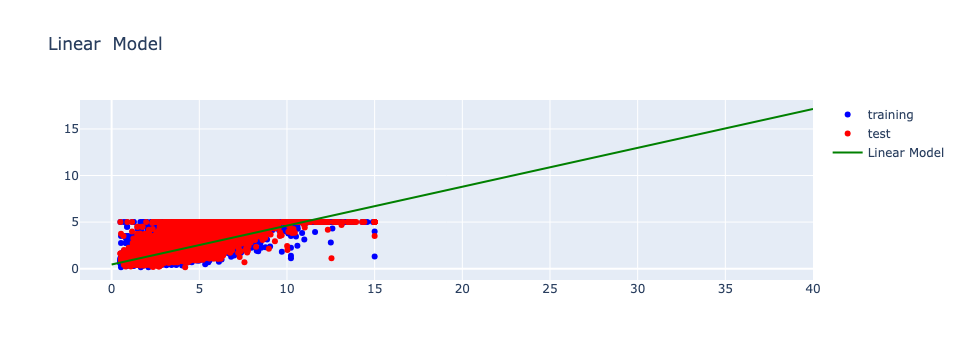

In [14]:
# use plotly to plot training, test, linear model
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots()

fig.add_trace(go.Scatter(x=X_train, y=y_train, mode='markers',  marker=dict(color='blue'), name="training")  )
fig.add_trace(go.Scatter(x=X_test, y=y_test, mode='markers',marker=dict(color='red'),  name="test")  )
fig.add_trace(go.Scatter(x=x_lin, y=y_lin ,marker=dict(color='green'),  name="Linear Model")  )


fig.update_layout(title_text="Linear  Model")

In [15]:
# training score
lin_reg.score(X_train.reshape(-1,1), y_train)

0.4738509942209922

In [16]:
# test score
lin_reg.score(X_test.reshape(-1,1), y_test)

0.4725720683367075

In [17]:
#Restrict the data to y<40, y_r
y_r = y[y < 40]
y_r.shape

(20640,)

In [18]:
# X_r
X_r = X[y < 40]
X_r.shape

(20640,)

In [19]:
# train test split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_r, y_r, test_size=0.33, random_state=42)

In [20]:
# fit the model
lin_reg = LinearRegression()
lin_reg.fit(Xr_train.reshape(-1,1),yr_train)

LinearRegression()

In [21]:
# coefficient
m = lin_reg.coef_
m

array([0.41731856])

In [22]:
# intercept
b = lin_reg.intercept_
b

0.44879836696807707

In [23]:
# line x and y
xr_lin = np.linspace(0,40,100)
yr_lin = m*xr_lin+b

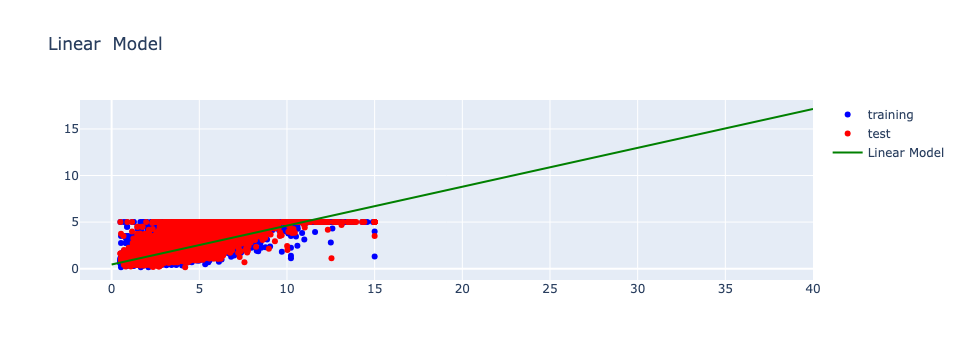

In [24]:
# # plotly restricted train, test, linear model
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots()

fig.add_trace(go.Scatter(x=Xr_train, y=yr_train, mode='markers',  marker=dict(color='blue'), name="training")  )
fig.add_trace(go.Scatter(x=Xr_test, y=yr_test, mode='markers',marker=dict(color='red'),  name="test")  )
fig.add_trace(go.Scatter(x=xr_lin, y=yr_lin ,marker=dict(color='green'),  name="Linear Model")  )


fig.update_layout(title_text="Linear  Model")

In [25]:
# training score
lin_reg.score(Xr_train.reshape(-1,1), yr_train)

0.4738509942209922

In [26]:
# test score
lin_reg.score(Xr_test.reshape(-1,1), yr_test)

0.4725720683367075

### Multiple Linear Regression


In [27]:
X = dataset.data
y = dataset.target

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
# fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [30]:
# intercept
b = lin_reg.intercept_
b

-37.08201093908004

In [31]:
# coefficients
m = lin_reg.coef_
m

array([ 4.44870466e-01,  9.55004561e-03, -1.21991503e-01,  7.79144696e-01,
       -7.68990809e-08, -3.29948505e-03, -4.19131153e-01, -4.34103468e-01])

In [32]:
# coefficient shape
m.shape

(8,)

In [33]:
# training score
lin_reg.score(X_train  , y_train )

0.609370412027382

In [34]:
# test score
lin_reg.score(X_test  , y_test )

0.597049412878397

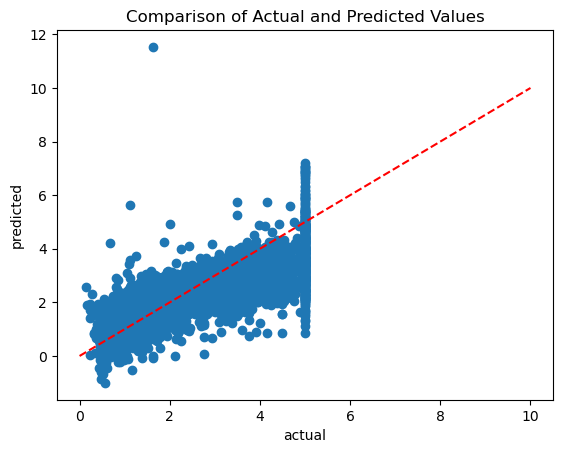

In [35]:
# actual vs predicted scatter plot
plt.scatter(y_test ,lin_reg.predict(X_test  ))
plt.plot([0,10],[0,10], 'r--')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('actual')
plt.ylabel('predicted');

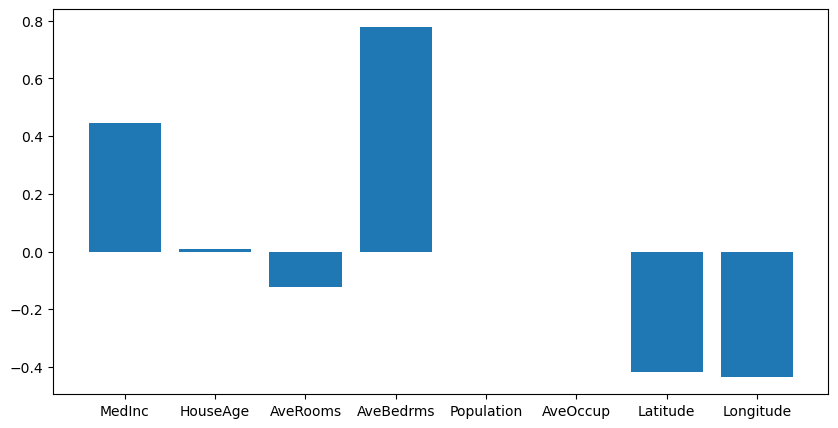

In [36]:
# coefficients in a bar graph
plt.figure(figsize=(10,5))
plt.bar(dataset.feature_names, lin_reg.coef_);

In [37]:
sorted = np.argsort(lin_reg.coef_)
sorted

array([7, 6, 2, 5, 4, 1, 0, 3])

In [38]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [39]:
np.array(dataset.feature_names)[sorted]

array(['Longitude', 'Latitude', 'AveRooms', 'AveOccup', 'Population',
       'HouseAge', 'MedInc', 'AveBedrms'], dtype='<U10')

In [40]:
lin_reg.coef_[sorted]

array([-4.34103468e-01, -4.19131153e-01, -1.21991503e-01, -3.29948505e-03,
       -7.68990809e-08,  9.55004561e-03,  4.44870466e-01,  7.79144696e-01])

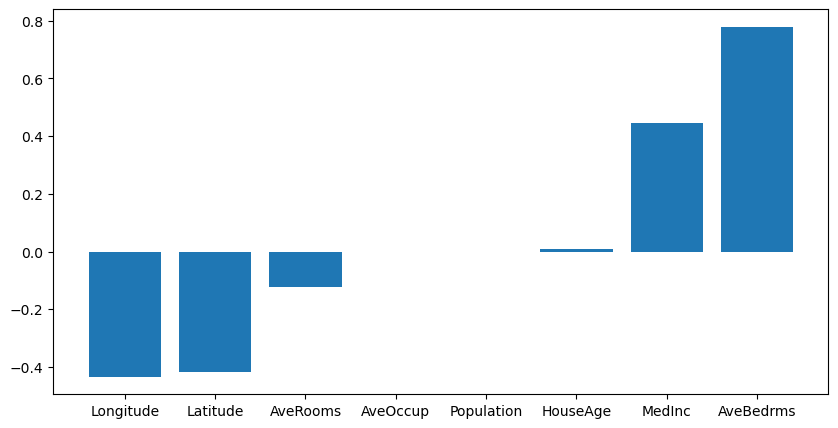

In [41]:
# sorted coefficients in a bar graph

plt.figure(figsize=(10,5))
plt.bar(np.array(dataset.feature_names)[sorted], lin_reg.coef_[sorted]);

## Desicion Tree
- consists of  a hierarchy of if/else questions
- predict the value of a target variable by answering these
  if/else questions
- find the smallest tree that fits the data.
- for regression tasks questions are less than a number or not.


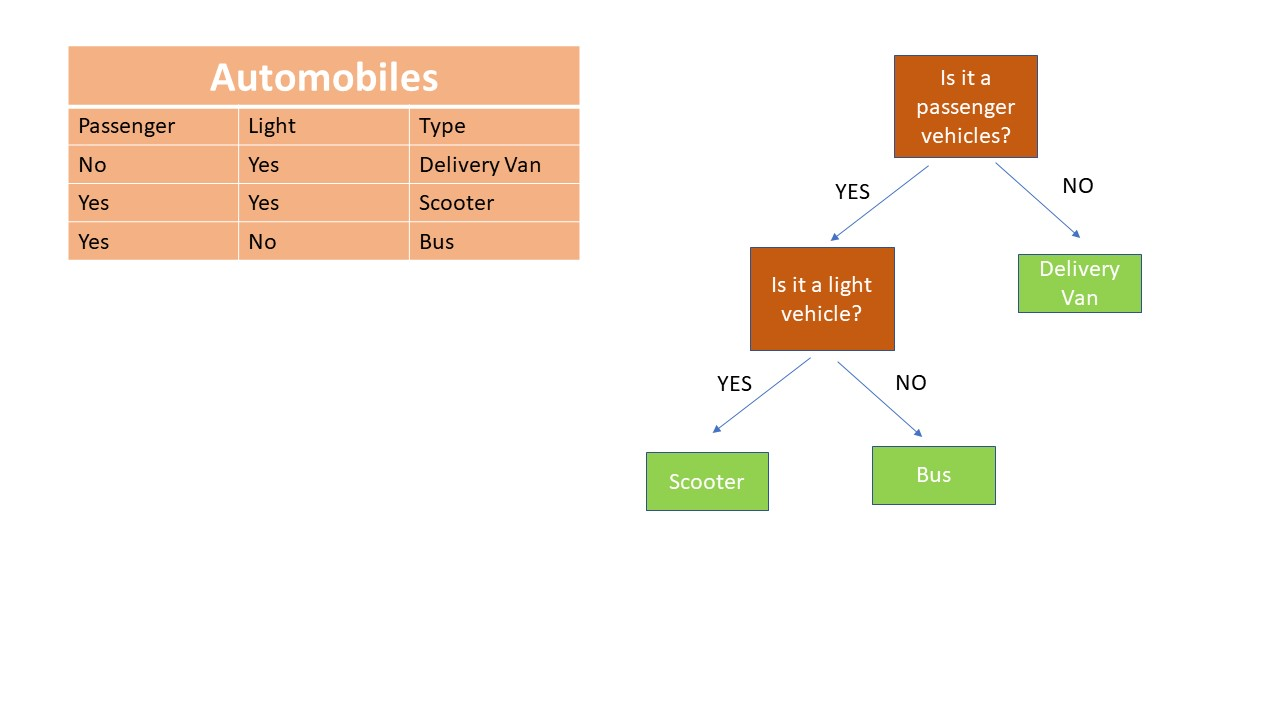

 ## Gini Impurity
 Start with the question which minimizes  
 $G = 1- \sum p_i^2$  


### Desicion Tree Classifier

In [42]:
# instantiate the class into an object
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [43]:
# help
help(dtc)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to

In [44]:
# fit the model
from sklearn.datasets import load_breast_cancer
dataset_bc = load_breast_cancer()
X_bc =  load_breast_cancer().data
y_bc =  load_breast_cancer().target
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.33, random_state=42)
dtc.fit(X_train_bc, y_train_bc)

DecisionTreeClassifier()

In [45]:
# train test scores
dtc.score(X_train_bc, y_train_bc), dtc.score(X_test_bc, y_test_bc)

(1.0, 0.9202127659574468)

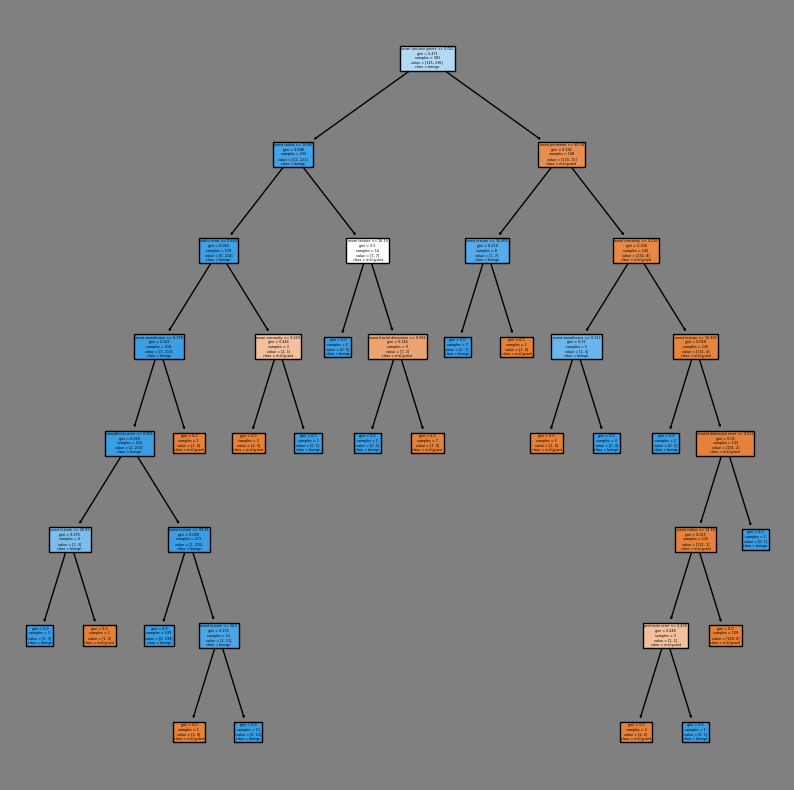

In [46]:
# sketch the tree
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10), facecolor='gray')

tree.plot_tree(dtc, filled=True, class_names=dataset_bc.target_names, feature_names=dataset_bc.feature_names, ax=ax);

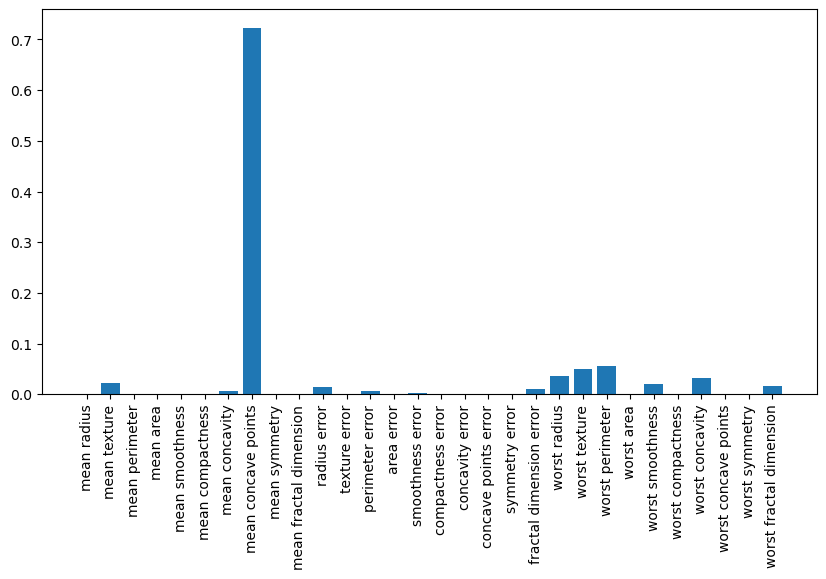

In [47]:
# coefficients in a bar graph
plt.figure(figsize=(10,5))
plt.bar(dataset_bc.feature_names, dtc.feature_importances_)
plt.xticks(rotation=90);

**Important Hyperparameter**

**max_depth** : int, default=None
- The maximum depth of the tree.

- If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [48]:
# max_depth=2
dtc2 = DecisionTreeClassifier(max_depth=2)
dtc2.fit(X_train_bc, y_train_bc)

DecisionTreeClassifier(max_depth=2)

In [49]:
# train test scores
dtc2.score(X_train_bc, y_train_bc), dtc2.score(X_test_bc, y_test_bc)

(0.9448818897637795, 0.925531914893617)

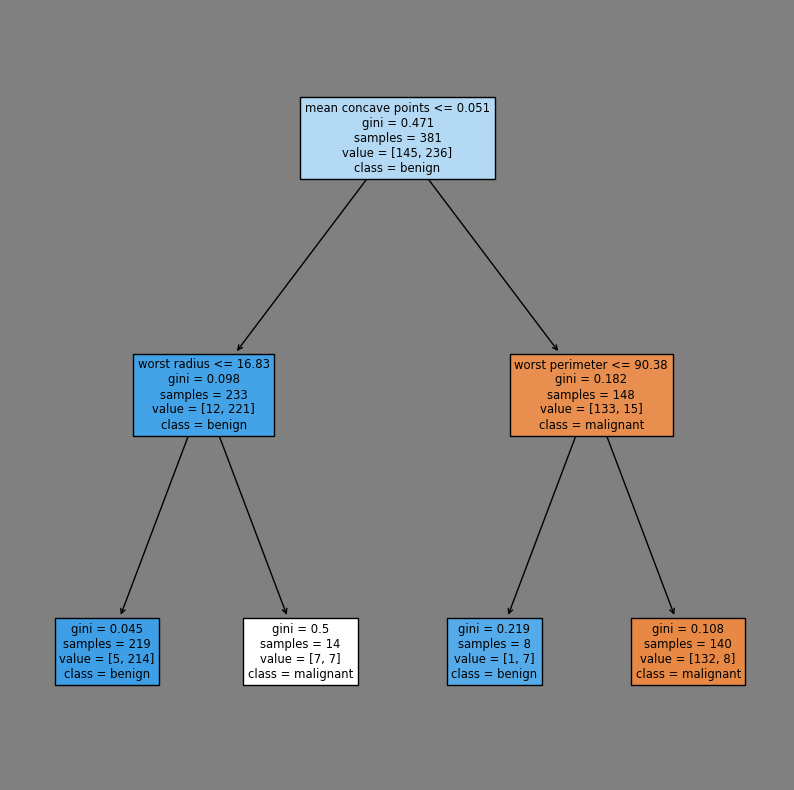

In [50]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10), facecolor='gray')

tree.plot_tree(dtc2, filled=True, class_names=dataset_bc.target_names, feature_names=dataset_bc.feature_names, ax=ax);

In [51]:
# feature importances
dtc2.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.88963542, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0410358 , 0.        , 0.06932878, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

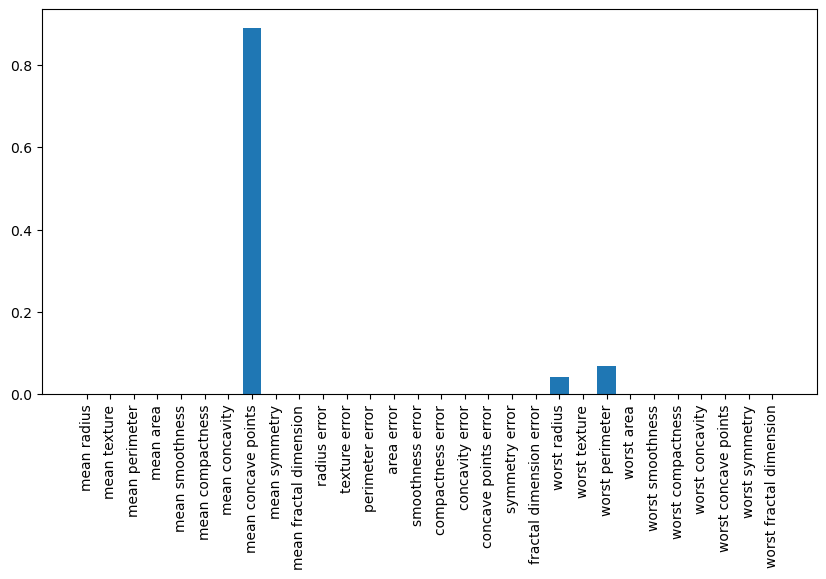

In [52]:
# coefficients in a bar graph
plt.figure(figsize=(10,5))
plt.bar(dataset_bc.feature_names, dtc2.feature_importances_)
plt.xticks(rotation=90);

### Desicion Tree Regressor

In [53]:
# instantiate the class into an object
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [54]:
# fit the model
dtr.fit(X_train , y_train )

DecisionTreeRegressor()

In [55]:
# scores
dtr.score(X_train , y_train ), dtr.score(X_test , y_test )

(1.0, 0.5884555899837689)

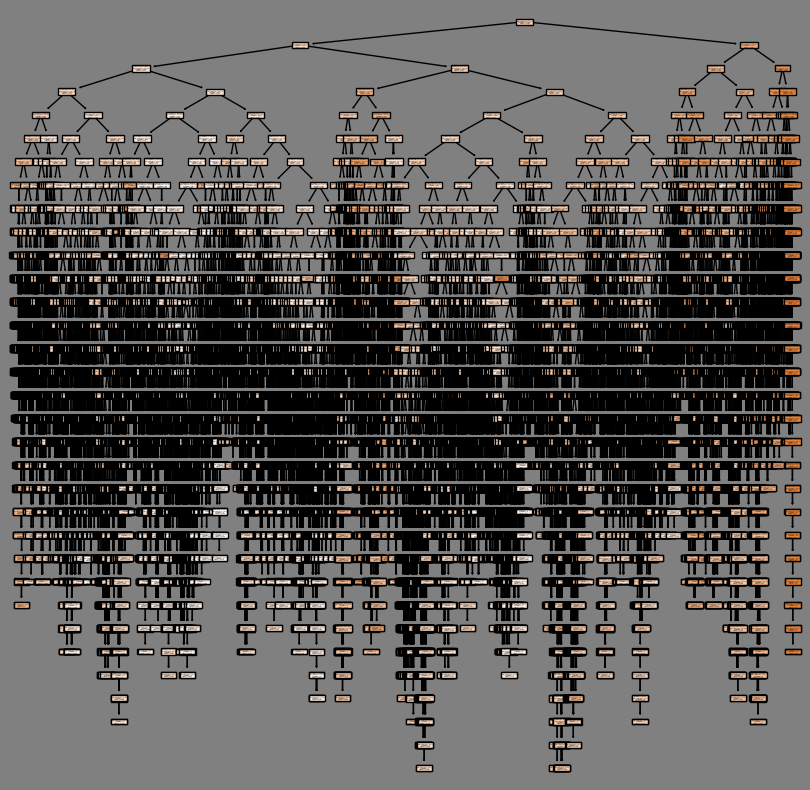

In [56]:
# sketch the tree
fig, ax = plt.subplots(figsize=(10, 10), facecolor='gray')

tree.plot_tree(dtr, filled=True, feature_names=dataset.feature_names, ax=ax);

In [57]:
# feature importances
dtr.feature_importances_

array([0.52237857, 0.06006469, 0.05320339, 0.02897168, 0.03106369,
       0.13288264, 0.08741881, 0.08401653])

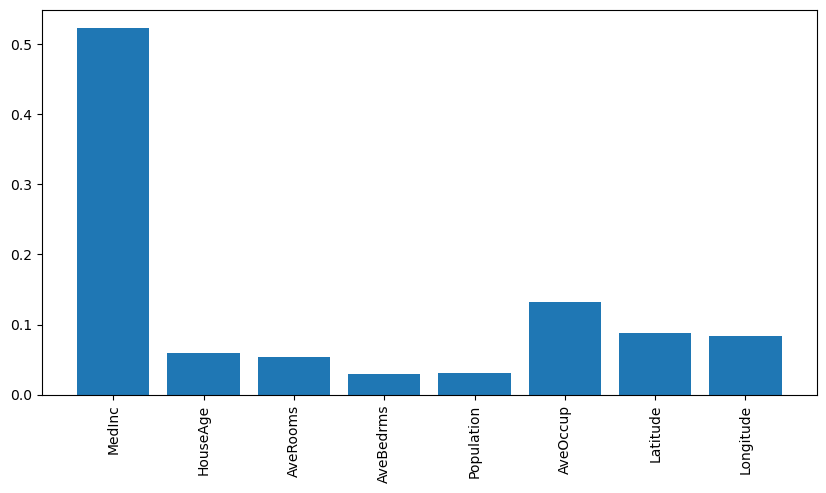

In [58]:
# coefficients in a bar graph
plt.figure(figsize=(10,5))
plt.bar(dataset.feature_names, dtr.feature_importances_)
plt.xticks(rotation=90);

In [59]:
# max_depth=2
dtr2 = DecisionTreeRegressor(max_depth=2)

In [60]:
# fit the model
dtr2.fit(X_train , y_train )

DecisionTreeRegressor(max_depth=2)

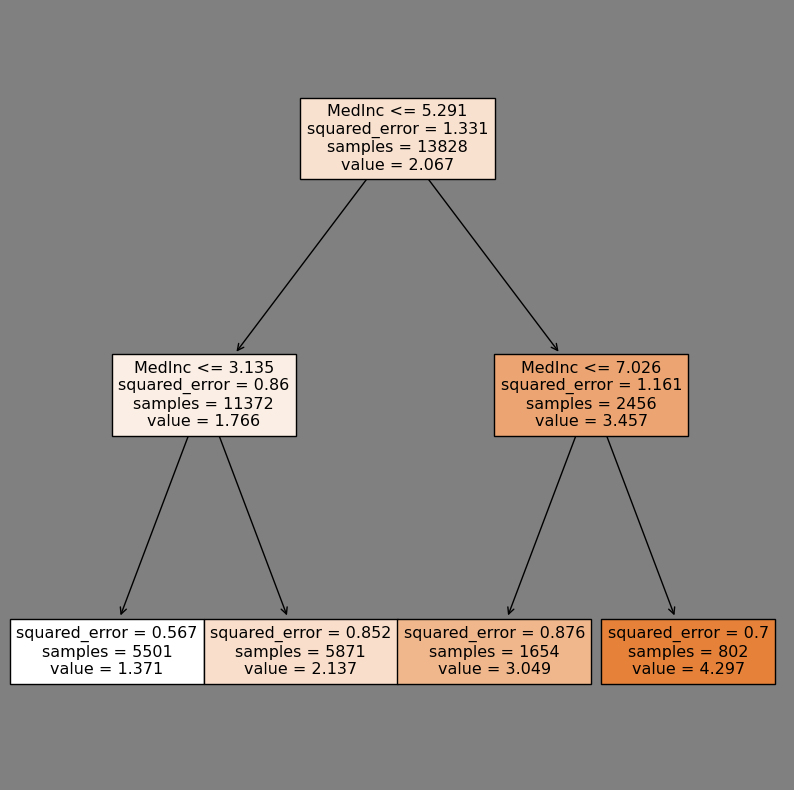

In [61]:
# skecth the tree
fig, ax = plt.subplots(figsize=(10, 10), facecolor='gray')
tree.plot_tree(dtr2, filled=True, feature_names=dataset.feature_names, ax=ax);

In [62]:
# feature importances
dtr2.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0.])

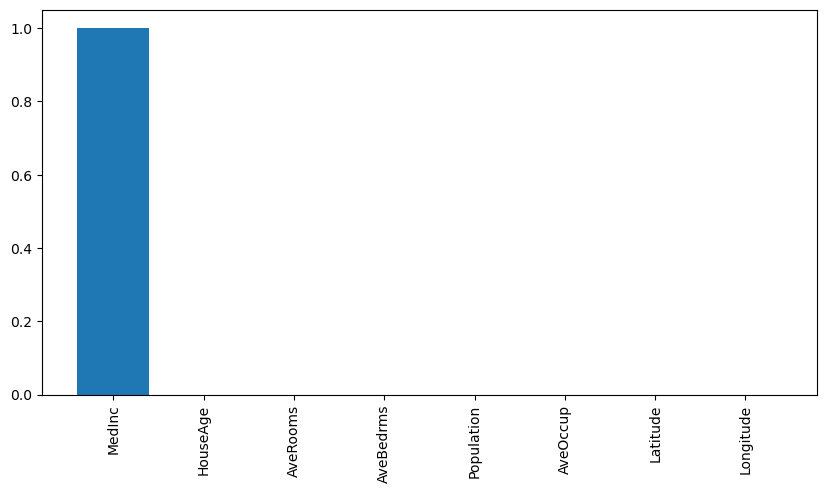

In [63]:
# coefficients in a bar graph
plt.figure(figsize=(10,5))
plt.bar(dataset.feature_names, dtr2.feature_importances_)
plt.xticks(rotation=90);

## Random Forest

- ensemble of decision trees for classification and regression

- usually trained with the “bagging” method
  - train with randomly chosen training dataset

- builds multiple decision trees and merges them together to get a more accurate and stable prediction adds additional randomness to the model, while growing the trees.

- Final Desicion:
  - Soft voting for classification
  - Average for regression

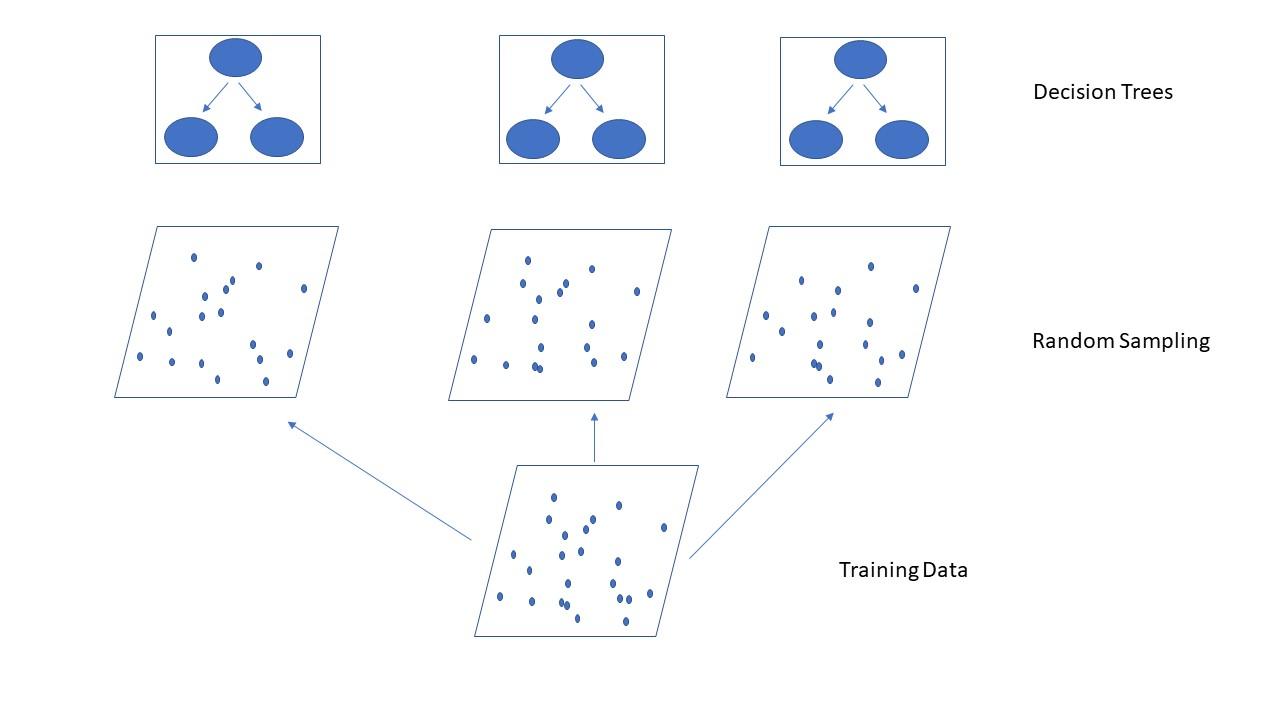

### Random Forest Classifier


In [64]:
# instantiate the class into an object
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [65]:
# help
help(rfc)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [66]:
# fit the model
rfc.fit(X_train_bc, y_train_bc)

RandomForestClassifier()

In [67]:
# train test scores
rfc.score(X_train_bc, y_train_bc), rfc.score(X_test_bc, y_test_bc)

(1.0, 0.9521276595744681)

**Important Hyperparameter**

 **n_estimators :** integer, optional (default=100)
- The number of trees in the forest.

In [68]:
# n_estimator=5
rfc5 = RandomForestClassifier(n_estimators=5)


In [69]:
# fit the model
rfc5.fit(X_train_bc, y_train_bc)

RandomForestClassifier(n_estimators=5)

In [70]:
# train test scores
rfc5.score(X_train_bc, y_train_bc), rfc5.score(X_test_bc, y_test_bc)

(1.0, 0.9414893617021277)

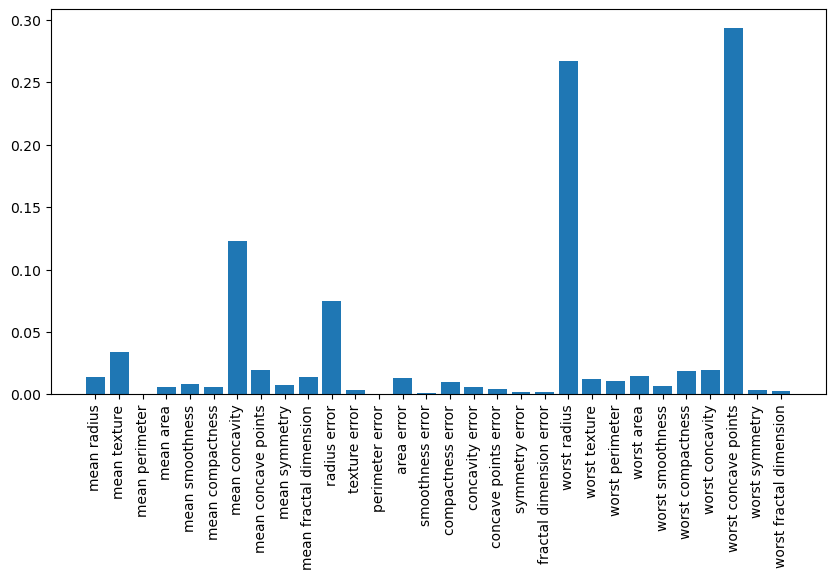

In [71]:
# coefficients in a bar graph
plt.figure(figsize=(10,5))
plt.bar(dataset_bc.feature_names, rfc5.feature_importances_)
plt.xticks(rotation=90);

### Random Forest Regressor


In [72]:
# instantiate the class into an object
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [73]:
# fit the model
rfr.fit(X_train , y_train )

RandomForestRegressor()

In [74]:
# train test scores
rfr.score(X_train , y_train ), rfr.score(X_test , y_test )

(0.9722250046056299, 0.8014232972663238)

In [75]:
# n_estimator=5
rfr5 = RandomForestRegressor(n_estimators=5)


In [76]:
# fit the model
rfr5.fit(X_train , y_train )

RandomForestRegressor(n_estimators=5)

In [77]:
# train test scores
rfr5.score(X_train , y_train ), rfr5.score(X_test , y_test )

(0.9491468901205052, 0.7602286543954643)

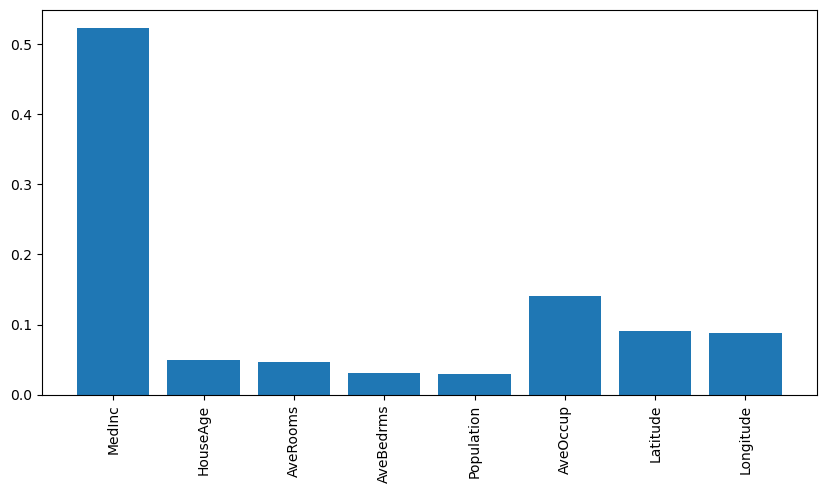

In [78]:
# coefficients in a bar graph
plt.figure(figsize=(10,5))
plt.bar(dataset.feature_names, rfr5.feature_importances_)
plt.xticks(rotation=90);

## XGboost
- tree based
- improved version of Random Forest

In [79]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [80]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Logistic Regression

In [81]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X_bc =  load_breast_cancer().data
y_bc =  load_breast_cancer().target
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.33, random_state=42)

In [82]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_bc, y_train_bc)

LogisticRegression(max_iter=10000)

In [83]:
log_reg.score(X_train_bc, y_train_bc)

0.9606299212598425

In [84]:
log_reg.score(X_test_bc, y_test_bc)

0.9680851063829787

In [85]:
log_reg.predict(X_test_bc[:5])

array([1, 0, 0, 1, 1])

In [86]:
y_test_bc[:5]

array([1, 0, 0, 1, 1])

In [87]:
log_reg.predict_proba(X_test_bc[:5]).round(3)

array([[0.14 , 0.86 ],
       [1.   , 0.   ],
       [0.998, 0.002],
       [0.002, 0.998],
       [0.   , 1.   ]])